# Telecom Churn Case Study 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data Understanding and exploration

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Data Preparation 

*   Considering the top 30% of the customers who have spent maximum in the first two months
*   Creating a Churn indicator according to the problem statement



In [6]:
# telecom['av_rech_amt'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2
# # Considering the data only above 70th percentile 
# telecom = telecom[telecom['av_rech_amt'] > telecom['av_rech_amt'].quantile(0.70)]
# telecom['total_usage'] = telecom['total_og_mou_9'] + telecom['total_ic_mou_9'] + telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
# # Creating Churn indicator 
# telecom['churn'] = np.where(telecom['total_usage']== 0, 1, 0) # Where 0 is False and 1 is True
# telecom['churn'].value_counts()

In [7]:
#Usage Based Churn:
telecom['churn'] = (telecom.total_ic_mou_9 == 0) & (telecom.total_og_mou_9 == 0) & ( (telecom.vol_2g_mb_9 == 0) | (telecom.vol_3g_mb_9 == 0) )

#removing 9th month features
telecom = telecom.drop(list(telecom.filter(regex='_9')), axis=1)

telecom.shape

(99999, 173)

In [8]:
telecom.churn.value_counts()

False    89483
True     10516
Name: churn, dtype: int64

In [9]:
# Calculating the churn rate
y = telecom['churn']
churn_rate = (sum(y)/len(y.index))*100
print(churn_rate)

10.51610516105161


In [10]:
# Filtering hight value customer
telecom['av_rech_amt'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7) / (telecom.total_rech_num_6 + telecom.total_rech_num_7)
telecom.av_rech_amt.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

count    99814.000000
mean        48.304356
std         52.076165
min          0.000000
10%         12.214865
20%         17.777778
30%         23.235294
40%         29.142857
50%         36.645752
60%         45.333333
70%         56.387518
80%         70.800000
90%         92.000000
99%        217.365000
max       4010.000000
Name: av_rech_amt, dtype: float64

In [11]:
telecom = telecom[telecom["av_rech_amt"] >=56.387518] 

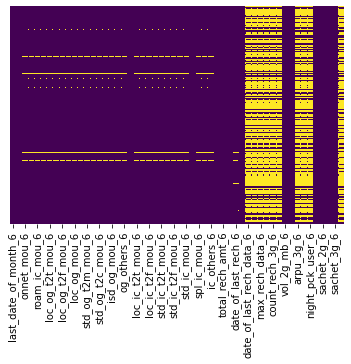

In [12]:
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [13]:
telecom.churn.value_counts()

False    27169
True      2775
Name: churn, dtype: int64

In [14]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Columns: 174 entries, mobile_number to av_rech_amt
dtypes: bool(1), float64(137), int64(27), object(9)
memory usage: 39.8+ MB


In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
telecom.describe(exclude=['bool', 'float64', 'int64'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,29944,29747,29541,29558,29318,28578,10173,10118,10327
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/28/2014,8/31/2014
freq,29944,29747,29541,4328,4377,3566,557,539,628


In [16]:
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'])
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'])
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])


In [17]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                515
std_og_t2o_mou                515
loc_ic_t2o_mou                515
last_date_of_month_6            0
last_date_of_month_7          197
last_date_of_month_8          403
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   989
onnet_mou_7                   934
onnet_mou_8                  1534
offnet_mou_6                  989
offnet_mou_7                  934
offnet_mou_8                 1534
roam_ic_mou_6                 989
roam_ic_mou_7                 934
roam_ic_mou_8                1534
roam_og_mou_6                 989
roam_og_mou_7                 934
roam_og_mou_8                1534
loc_og_t2t_mou_6              989
loc_og_t2t_mou_7              934
loc_og_t2t_mou_8             1534
loc_og_t2m_mou_6              989
loc_og_t2m_mou_7              934
loc_og_t2m_mou_8             1534
loc_og_t2f_mou

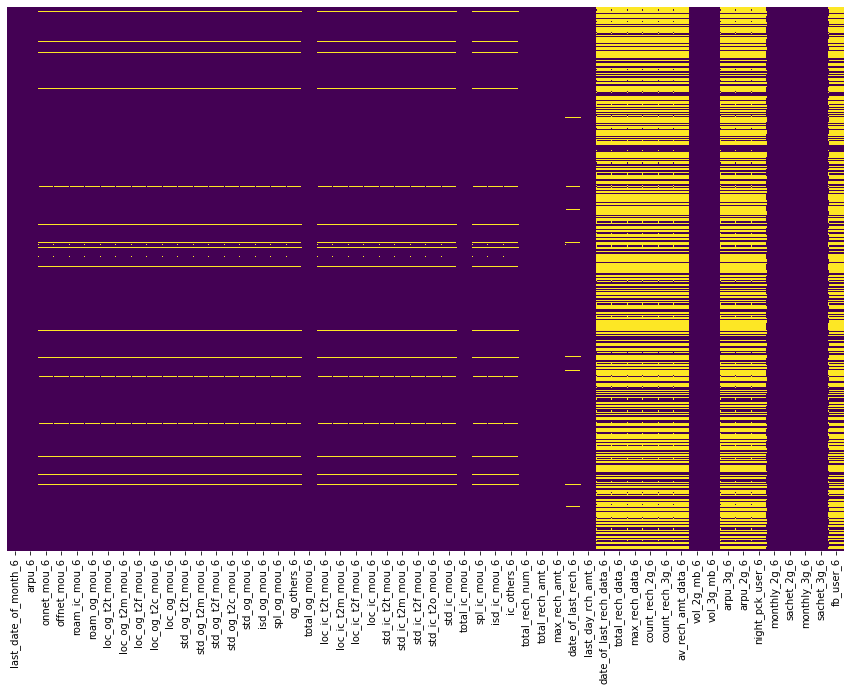

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

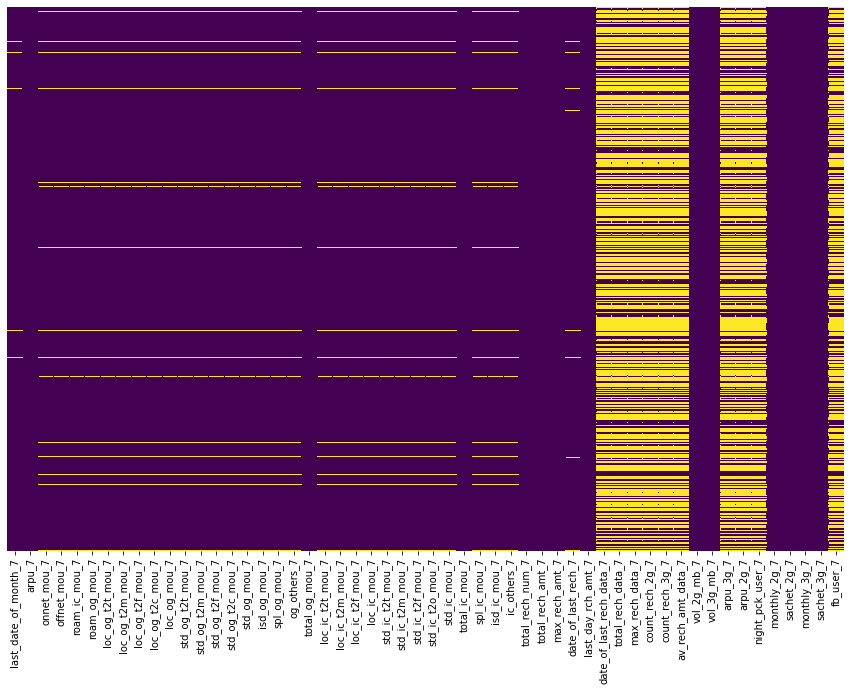

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_7'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

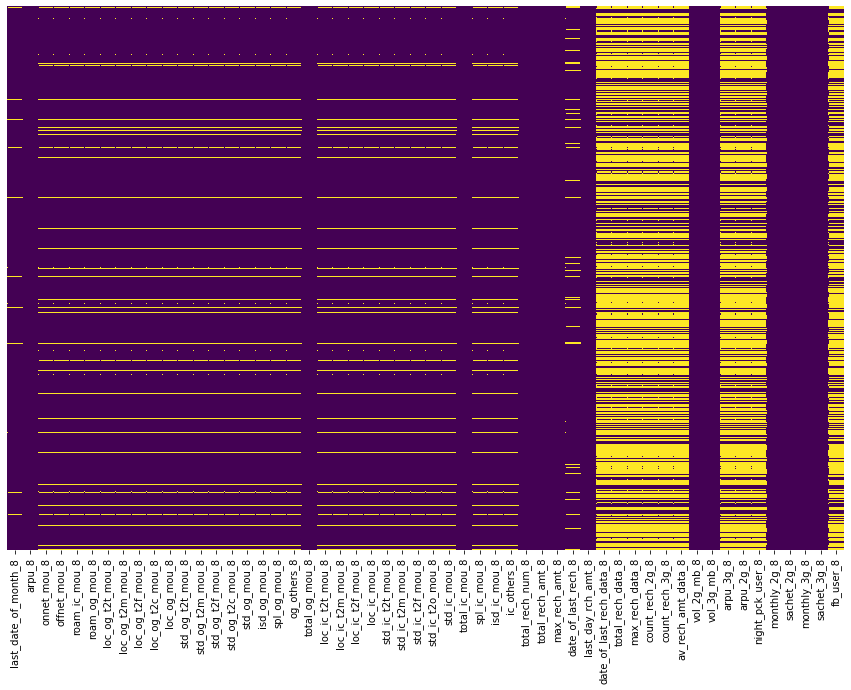

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_8'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [21]:
#dropping cols which are showing zero variance
telecom = telecom.drop(['date_of_last_rech_data_6', 'total_rech_data_6', 
                        'max_rech_data_6', 'count_rech_2g_6', 
                        'count_rech_3g_6', 'av_rech_amt_data_6', 
                        'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 
                        'fb_user_6','date_of_last_rech_data_7', 
                        'total_rech_data_7', 'max_rech_data_7', 
                        'count_rech_2g_7', 'count_rech_3g_7', 
                        'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 
                        'night_pck_user_7', 'fb_user_7','date_of_last_rech_data_8', 
                        'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
                        'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 
                        'arpu_2g_8', 'night_pck_user_8', 'fb_user_8'], axis=1)

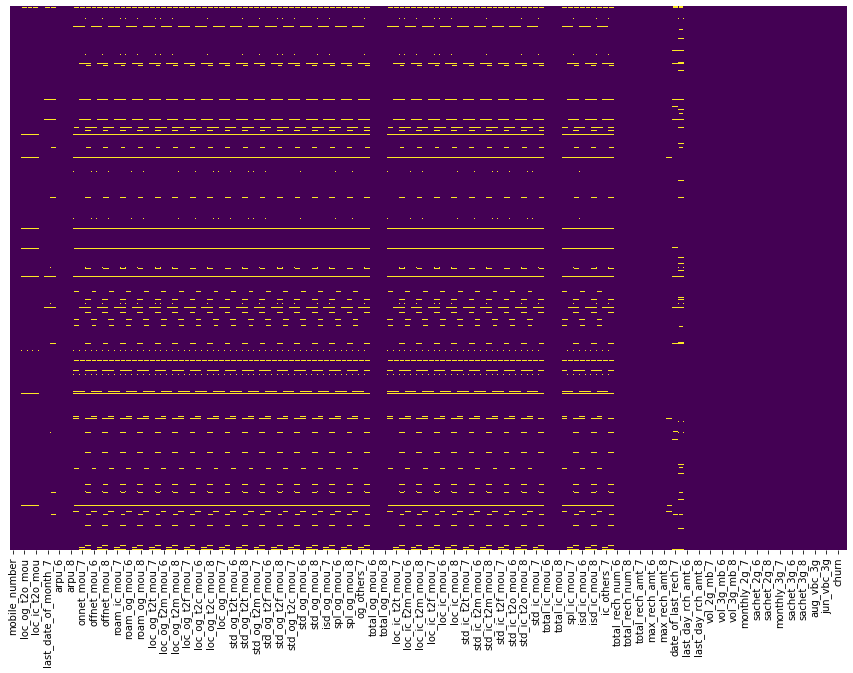

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [23]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.994400e+04,29944.0,29429.0,29429.0,29429.0,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.0,29010.0,28410.0,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.0,29010.0,28410.0,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,7.001260e+09,109.0,0.0,0.0,0.0,477.216026,472.777378,443.769340,223.177445,223.418307,206.190085,341.038423,339.856561,316.657508,16.374998,12.713451,12.781130,26.719926,20.091048,20.093606,83.027272,83.057070,79.894595,164.151746,161.852917,157.357718,7.995394,8.060383,7.675661,1.0

In [24]:
# Dropping columns which are having constant values
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
                        'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 
                        'last_date_of_month_6', 'last_date_of_month_7', 
                        'last_date_of_month_8', 'date_of_last_rech_6', 
                        'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom.shape

(29944, 129)

In [25]:
telecom.isnull().sum()

mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6            989
onnet_mou_7            934
onnet_mou_8           1534
offnet_mou_6           989
offnet_mou_7           934
offnet_mou_8          1534
roam_ic_mou_6          989
roam_ic_mou_7          934
roam_ic_mou_8         1534
roam_og_mou_6          989
roam_og_mou_7          934
roam_og_mou_8         1534
loc_og_t2t_mou_6       989
loc_og_t2t_mou_7       934
loc_og_t2t_mou_8      1534
loc_og_t2m_mou_6       989
loc_og_t2m_mou_7       934
loc_og_t2m_mou_8      1534
loc_og_t2f_mou_6       989
loc_og_t2f_mou_7       934
loc_og_t2f_mou_8      1534
loc_og_t2c_mou_6       989
loc_og_t2c_mou_7       934
loc_og_t2c_mou_8      1534
loc_og_mou_6           989
loc_og_mou_7           934
loc_og_mou_8          1534
std_og_t2t_mou_6       989
std_og_t2t_mou_7       934
std_og_t2t_mou_8      1534
std_og_t2m_mou_6       989
std_og_t2m_mou_7       934
s

# Treating the Outliers

In [26]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.994400e+04,29944.0,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,28955.000000,29010.000000,28410.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,7.001260e+09,109.0,477.216026,472.777378,443.769340,223.177445,223.418307,206.190085,341.038423,339.856561,316.657508,16.374998,12.713451,12.781130,26.719926,20.091048,20.093606,83.027272,83.057070,79.894595,164.151746,161.852917,157.357718,7.995394,8.060383,7.675661,1.059151,1.192751,1.281591,255.183390,252.979324,244.936780,129.836818,132.555954,118.715940,144.762036,149.946877,131.655835,2.471786,2.486382,2.286114,277.074374,284.992867,252.661309,2.203267,2.159372,1.979431,3.883160,4.494004,4.6

In [27]:
# Imputing the missing values with median column values 
cols_missing = telecom.columns[telecom.isnull().sum()>0]
for col in cols_missing:
  telecom[col].fillna((telecom[col].median()), inplace=True)

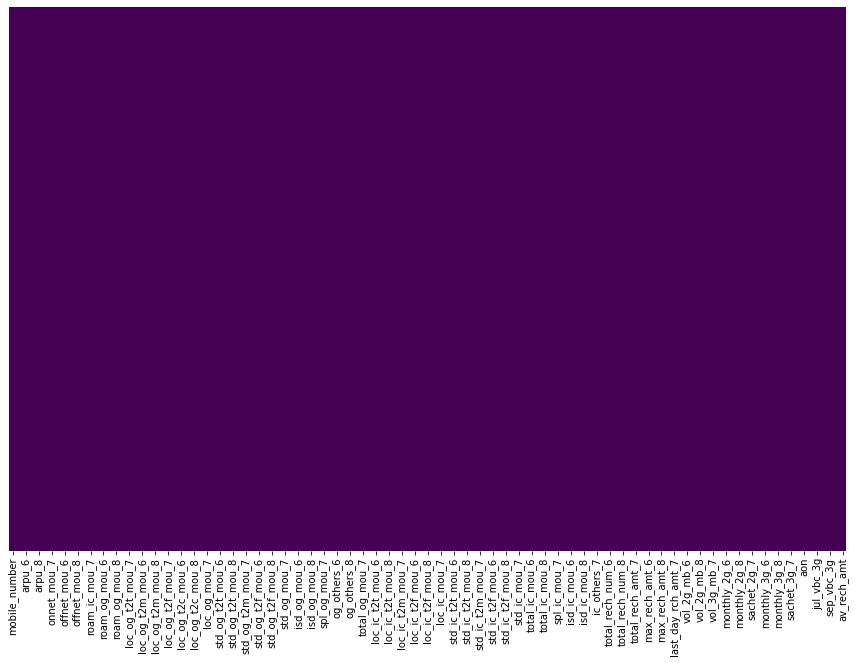

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [29]:
# Dropping all the null values from the data
# telecom = telecom.dropna(axis='rows', how='any')
telecom.shape

(29944, 129)

# Exploratory Data Analysis

In [30]:
telecom.churn.value_counts()

False    27169
True      2775
Name: churn, dtype: int64

In [31]:
telecom.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6    

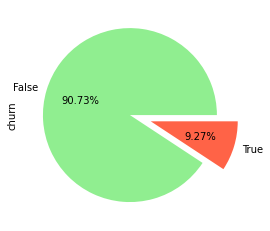

In [32]:
# Plotting the Churn vs Non Chrun customers
telecom['churn'].value_counts().plot.pie(explode=[0,0.25],
                                         autopct='%1.2f%%',
                                         colors= ["#90EE90", "#FF6347"],)

In [33]:
# sns.pariplot(telecom, hue='churn')

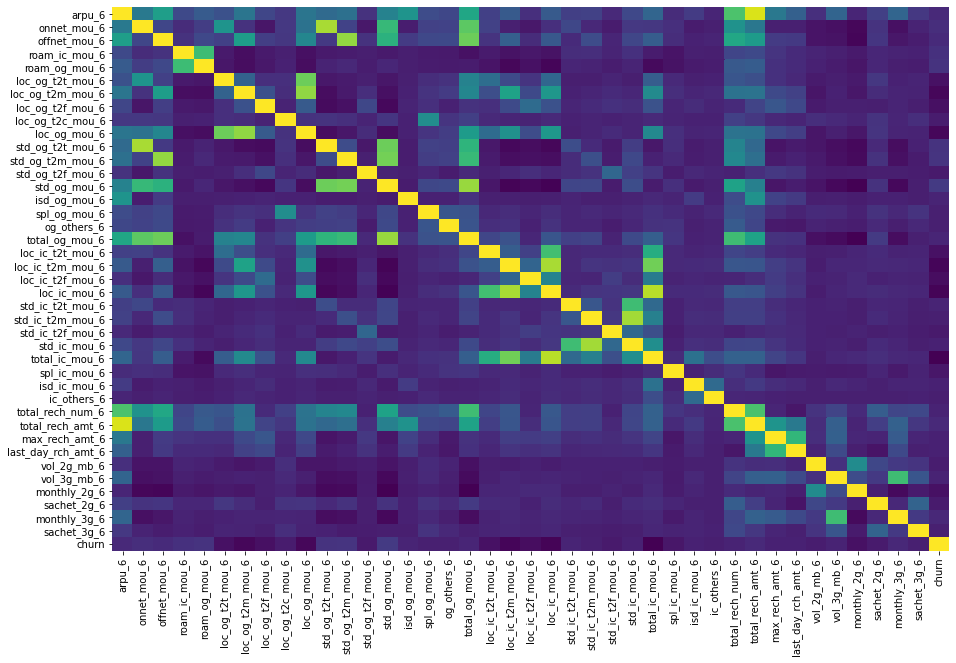

In [34]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_6'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

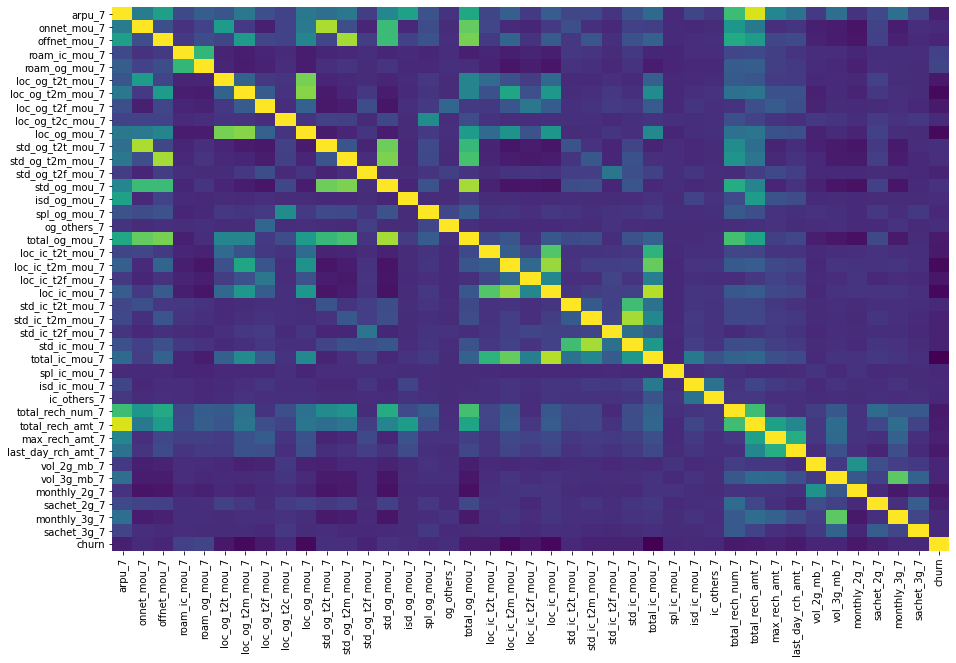

In [35]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_7'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

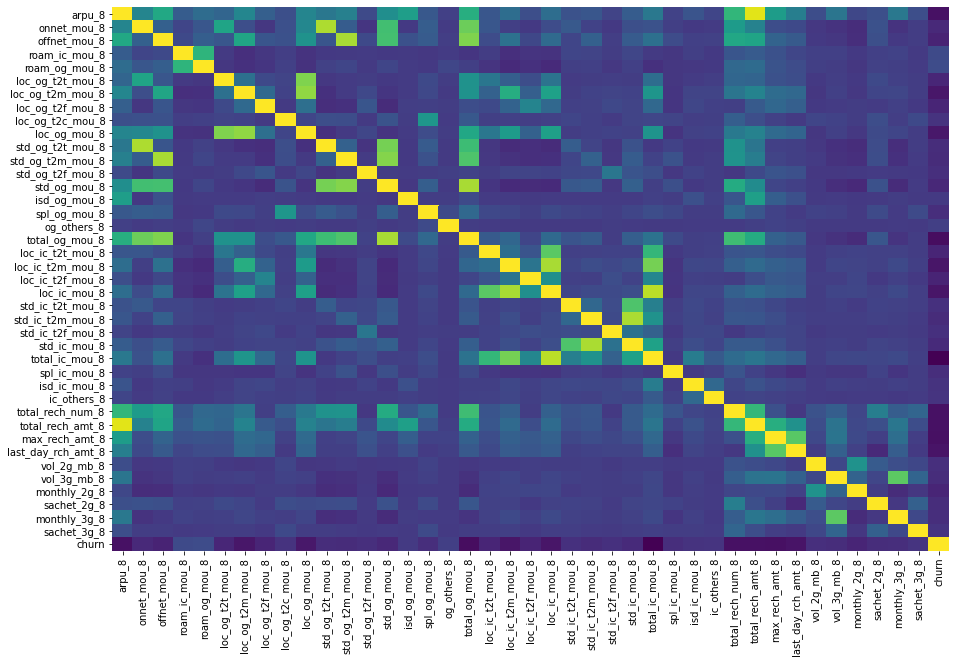

In [36]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_8'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

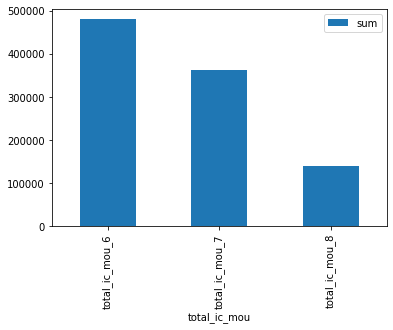

In [37]:
cols = telecom.filter(regex='total_ic_mou_').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_ic_mou_').sum(), columns=['sum'])
df['total_ic_mou'] = df.index
df.plot.bar(x='total_ic_mou', y='sum')
plt.show()

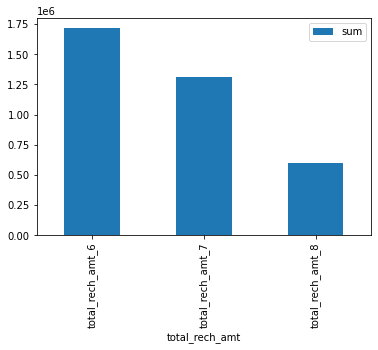

In [38]:
cols = telecom.filter(regex='total_rech_amt').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_rech_amt').sum(), columns=['sum'])
df['total_rech_amt'] = df.index
df.plot.bar(x='total_rech_amt', y='sum')
plt.show()

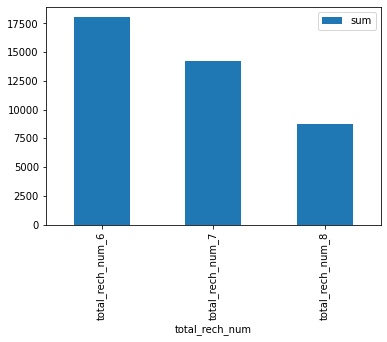

In [39]:
cols = telecom.filter(regex='total_rech_num').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_rech_num').sum(), columns=['sum'])
df['total_rech_num'] = df.index
df.plot.bar(x='total_rech_num', y='sum')
plt.show()

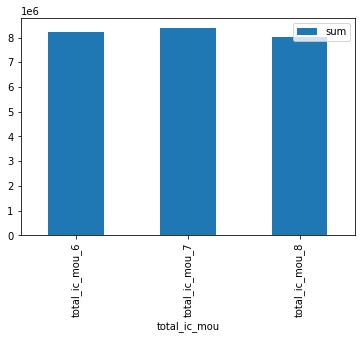

In [40]:
trend_df = pd.DataFrame(data=telecom.filter(regex='total_ic_mou_').sum(), columns=['sum'])
trend_df['total_ic_mou'] = trend_df.index
trend_df.plot.bar(x='total_ic_mou', y='sum')
plt.show()

# Model Builing Process

In [41]:
# Importing all the libraries for model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from sklearn import metrics

In [ ]:
X = telecom.drop(['churn','mobile_number'], axis=1)
y = telecom['churn']

We have observer a churn rate of 5.15%

In [ ]:
feature_cols = X.columns

# Handle class imbalance
nm = NearMiss()
X, y = nm.fit_sample(X, y)

# X = X.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

# X = X.astype('float64').dtypes

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
len(y_test)

In [ ]:
# Adaboost Classifier Model 
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)
y_pred3 = ada_clf.predict(X_test)
print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred3))
confusion = metrics.confusion_matrix(y_test, y_pred3)
print(confusion)
print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "base_estimator__criterion" : ["gini", "entropy"],
#     "base_estimator__splitter" :   ["best", "random"],
#     "base_estimator__max_depth" : [2],
#     "n_estimators": [100, 150, 200]
# }
# DTC = DecisionTreeClassifier(random_state = 11)
# ABC = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R", learning_rate=0.5)

# grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'recall')
# grid_search_ABC.fit(X_train, y_train)

# y_pred4 = grid_search_ABC.predict(X_test)
# print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred4))
# confusion = metrics.confusion_matrix(y_test, y_pred4)
# print(confusion)
# print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
# print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

In [ ]:
log_clf = LogisticRegression(max_iter=200)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
)

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(confusion)
    print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
    print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

In [ ]:
#Feature Importance

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_
imp = pd.DataFrame(importance, columns=['importance'])
features = pd.DataFrame(feature_cols, columns=['features'])
imp_features = imp.merge(features, left_index=True, right_index=True)
imp_features = imp_features.sort_values(by='importance', ascending=False)

imp_features[:10]

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(feature_cols, importance)
plt.tick_params(rotation=90)
plt.show()

In [ ]:
X2 = telecom.drop('churn', axis=1)
y2 = telecom['churn']
nm = NearMiss()
X2, y2 = nm.fit_sample(X2, y2)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X2_reduced = pca.fit_transform(X2)
pca.explained_variance_ratio_

In [ ]:
df = pd.DataFrame(data=X2_reduced)
df.head()
df = df.merge(y2, left_index=True, right_index=True)
df['pca1'] = df[0]
df['pca2'] = df[1]
df = df.drop(columns=[0,1], axis=1)
def check(b):
    if b:
        return 0
    else:
        return 1
df_y = y2.map(check)
colors = np.array(["blue", "green"])
df.plot.scatter(x='pca1', y='pca2', c=colors[df_y])

In [ ]:
df_churn = df[df['churn'] == True]
df_churn.plot.scatter(x='pca1', y='pca2')

In [ ]:
df_non_churn = df[df['churn'] == False]
df_non_churn.plot.scatter(x='pca1', y='pca2')

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [ ]:
log_clf2 = LogisticRegression()
rnd_clf2 = RandomForestClassifier()
svm_clf2 = SVC()
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svm_clf2)]
)

for clf in (log_clf2, rnd_clf2, svm_clf2, voting_clf2):
    clf.fit(X_train2, y_train2)
    y_pred2 = clf.predict(X_test2)
    print(clf.__class__.__name__, accuracy_score(y_test2, y_pred2))